In [5]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_anthropic import ChatAnthropic

In [6]:
load_dotenv()

True

In [7]:
llm = ChatAnthropic(model_name='claude-3-5-sonnet-20241022', streaming=True)

In [8]:
llm.invoke('hi')

AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={'model_name': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None}, id='run--ded4a87b-0598-42c5-b81d-06f3ee2f1f69-0', usage_metadata={'input_tokens': 8, 'output_tokens': 12, 'total_tokens': 20, 'input_token_details': {'cache_creation': 0, 'cache_read': 0}})

In [ ]:
class LLMState(TypedDict):
    question: str
    answer: str

In [9]:
def llm_conversation(state: LLMState) -> LLMState:
    question = state['question']

    answer = llm.invoke(f'Answer the following question {question}')

    state['answer'] = answer

    return state


In [10]:
graph = StateGraph(LLMState)

graph.add_node('llm_conversation', llm_conversation)
# graph.add_node('')

In [11]:
graph.add_edge(START, 'llm_conversation')
graph.add_edge('llm_conversation', END)


workflow = graph.compile()

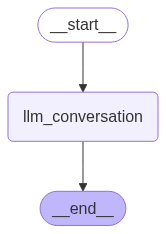

In [12]:
workflow

In [14]:
initial_state = {'question': 'Who is the current Prime Minister of Pakistan'}

result = workflow.invoke(initial_state)

In [15]:
result

{'question': 'Who is the current Prime Minister of Pakistan',
 'answer': AIMessage(content='As of 2024, Shehbaz Sharif is the current Prime Minister of Pakistan. He was elected as Prime Minister for the second time on March 3, 2024, following the controversial February 2024 general elections. He previously served as Prime Minister from April 2022 to August 2023. Shehbaz Sharif is the leader of the Pakistan Muslim League-Nawaz (PML-N) party and is the younger brother of former Prime Minister Nawaz Sharif.', additional_kwargs={}, response_metadata={'model_name': 'claude-3-5-sonnet-20241022', 'stop_reason': 'end_turn', 'stop_sequence': None}, id='run--4d94ab55-c754-4b44-965b-a2d1a67aca88-0', usage_metadata={'input_tokens': 19, 'output_tokens': 116, 'total_tokens': 135, 'input_token_details': {'cache_creation': 0, 'cache_read': 0}})}

In [20]:
result['answer'].content

'As of 2024, Shehbaz Sharif is the current Prime Minister of Pakistan. He was elected as Prime Minister for the second time on March 3, 2024, following the controversial February 2024 general elections. He previously served as Prime Minister from April 2022 to August 2023. Shehbaz Sharif is the leader of the Pakistan Muslim League-Nawaz (PML-N) party and is the younger brother of former Prime Minister Nawaz Sharif.'